# Block 6 Assignment: PhD Express

Welcome to this assignment! Today, we will both create an experiment and analyse the results.
We will guide you throughout this process - once it is done, your only job will be to ask ChatGPT to write 200 pages for your thesis, and you should get your PhD by the end of the day.

## 6.1 Create your stimuli
The behavioural experiment we will develop today is very simple. We will give a list of words to participants.
For each word, they have to grade, on a scale from 1 to 5, how much each word makes them happy.

What are our hypotheses? We will leave you invent something for the thesis.

### 6.1.1 Check the list of words
First, we need to check our list of words. We provide you a file called `words.txt`, containing words in Spanish.

In this file, each word is on a new line, separated from each other by a blank line.

* Read the file
* Print the words in alphabetical order
* Save these words into a new file named `words_alphabetical.txt`.

Compared to the original, this new file should separate the words by a single line break, this time without the blank lines.

In [1]:
with open("C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/words.txt", encoding="UTF-8") as f:
    content = f.read()
    list_words = content.split("\n")
    while '' in list_words:
        list_words.remove('')
    list_words.sort()

print(list_words)

with open("C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/alphabetical_words.txt", "a", encoding="UTF-8") as f:
    for word in list_words:
        f.write(word)
        f.write('\n')

['aceituna', 'acordeón', 'bebé', 'bombero', 'chocolate', 'coche', 'cubo', 'diablo', 'escoba', 'escuela', 'gato', 'guerra', 'miel', 'mosca', 'muñeca', 'nevera', 'pizza', 'reloj', 'saxofón', 'ventana']


### 6.1.2 Select your words
For the experiment, we only want to keep words that are above a certain frequency in the Spanish language.
First, you will need to get the frequency of each word:
* Go to the [BCBL Espal database](https://www.bcbl.eu/databases/espal/).
* Click on **Words to Properties**.
* At the top, click on the **Browse...** button next to "File with Items:"
* Select your `words_alphabetical.txt` file.
* Under "Word Frequency", select **Word frequency per million**.
* Click on **Submit**.
* Download your file.

Once you have your file, open it in Python, and create a new list `words_to_keep` containing only the words having a frequency over 10.

In [53]:
import re
with open("C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/wordlist_out.txt", encoding="UTF-8") as f:
    content = f.read()
    list_word_frq = re.split('\t|\n', content)
    while '' in list_word_frq:
        list_word_frq.remove('')
    words_to_keep = []
    for i in range(3, len(list_word_frq), 2):
        if float(list_word_frq[i]) > 10: words_to_keep.append(list_word_frq[i-1])

print(words_to_keep)

['bebé', 'chocolate', 'coche', 'diablo', 'escuela', 'gato', 'guerra', 'miel', 'reloj', 'ventana']


### 6.1.3 Randomize your stimuli
Now that we have our stimuli, we need to create our word lists for each of our 10 participants.

Create a folder named `word_lists`.

I this folder, you will create 10 files named `word_list_XX.txt` (where XX is between 01 and 10 - be sure to have a [leading zero](https://www.w3schools.com/python/ref_string_zfill.asp)!)

Use `os.path.join` to join the folder name with each file.

Make sure that each file has the list of words randomized.

For extra-credit, ensure that across all subjects, **each word appears at each position** (e.g. if `"gato"` appears at the first position for subject 1, it should never appear at the first position for every other subject).

In [21]:
number_name = '0' + str(1)
print (number_name)

01


In [36]:
import random
import os
os.makedirs('C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/word_lists', exist_ok=True)
folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/word_lists'

for i in range(1,10):
    if i<10:
        file_name = 'word_list_' + '0' + str(i) + '.txt'
    else: file_name = 'word_list_' + str(i) + '.txt'
    with open(os.path.join(folder, file_name), "a", encoding="UTF-8") as f:
        random.shuffle(words_to_keep)
        for word in words_to_keep:
            f.write(word)
            f.write('\n')         

## 6.2 Analyse the results

### 6.2.1 Rename your files
Thanks to the power of high-speed internet, the data has already been collected for your 10 participants!

Two different people helped you collect the data, and both had a different naming scheme:
* One set the name of the files as the participant ID.
* The other used the participant ID, preceeded by "WE_" (for Word Experiment).

There are also some other files (`participants_list.txt` and `readme.md`) that we don't want to use.

Using your skills in Python:
* List all the files present in `experiment_results`.
* Copy the TSV files to a new folder `experiment_results_renamed` (ignore the other files).
* In the process, in the new folder, rename the files starting with `WE_` to only keep the participant ID.

In [42]:
import os
def get_files_with_extension (extension, path):
    total_list = os.listdir(path)
    extension_list = []
    for file in total_list:
        file_split = file.split(".")
        if file_split[-1] == extension:
            extension_list.append(file)
    return extension_list

In [45]:
tsv_list = get_files_with_extension ('tsv', 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results')
os.makedirs('C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results_renamed', exist_ok=True)
original_folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results'
renamed_folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results_renamed'
for file in tsv_list:
    if 'WE_' in file:
        os.rename(os.path.join(original_folder, file), os.path.join(renamed_folder, file.replace('WE_', '')))
    else:
        os.rename(os.path.join(original_folder, file), os.path.join(renamed_folder, file))

### 6.2.2 Get the participants names

Now that you have all the files that are of interest, open them, and gather the names of the participants. They are all located at the first line of each file, separated by a tab from "Name:".

Print all of the names on successive lines.

In [10]:
import os
import re
renamed_folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results_renamed'
with open("C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/participants_names.txt","a", encoding="UTF-8") as f:
    list_names = []
    for file in os.listdir(renamed_folder):
        with open(os.path.join(renamed_folder, file), encoding="UTF-8") as ff:
            content = ff.read()
            list_result_doc = re.split('\t|\n|:', content)
            list_names.append(list_result_doc[2])
    print(list_names)
    for name in list_names:
            f.write(name)
            f.write('\n')

['Chris P. Bacon', 'Dan Druff', 'Frank N. Stein', 'Jack Pott', 'Mack Aroney', 'Paige Turner', 'Russel Sprout', 'Sue Flay', 'Warren Peace', 'Zoltan Pepper']


### 6.2.3 Get the results for one word

Create a function `get_average_grade` that takes a word as a parameter, and returns the average happiness grade given to this word by the participants.

In [42]:
import os
import re
import numpy as np
renamed_folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results_renamed'
files_in_folder = os.listdir(renamed_folder)

def get_average_grade (word):
    files_in_folder = os.listdir(renamed_folder)
    grades_array = np.nan * np.ones(len(files_in_folder)) # initialising an np-array with NaNs
    for i in range(len(files_in_folder)):        
        with open(os.path.join(renamed_folder, files_in_folder[i]), encoding="UTF-8") as f:
            content = f.read()
            list_result_doc = re.split('\t|\n|:', content)
            grades_array[i] = list_result_doc[list_result_doc.index(word)+1]
    return grades_array.mean(0)

In [48]:
print(get_average_grade('chocolate'))
print(get_average_grade('ventana'))

8.2
5.5


### 6.2.4 Plot the results for each word

Now that you have a function to get the average grade for one word, create a bar plot that plots the average grade for each word.

Organize your bar plot so that the words are in decreasing order of happiness.

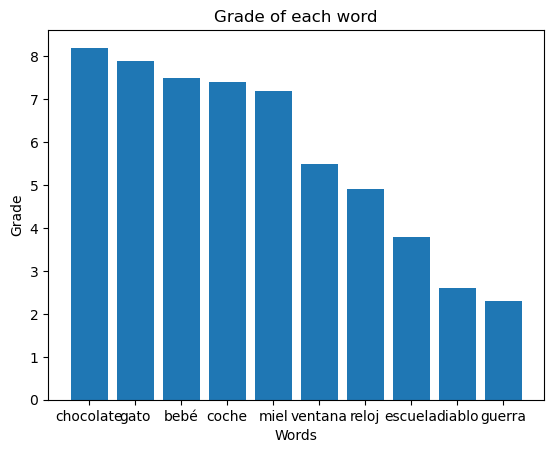

In [65]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
renamed_folder = 'C:/Users/Iago/Desktop/Pycourse/B6_Assignment_Material/experiment_results_renamed'
files_in_folder = os.listdir(renamed_folder)

words_to_keep_ordered = sorted(words_to_keep, key=get_average_grade, reverse=True)

x = words_to_keep_ordered
y = []
for word in words_to_keep_ordered:
    y.append(get_average_grade(word))
plt.bar(x, y)
plt.xlabel('Words')
plt.ylabel('Grade')
plt.title('Grade of each word')
plt.show()